# Lecture 8

In this lecture we focus on visualizing the distribution of data. 

In [1]:
from datascience import *
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

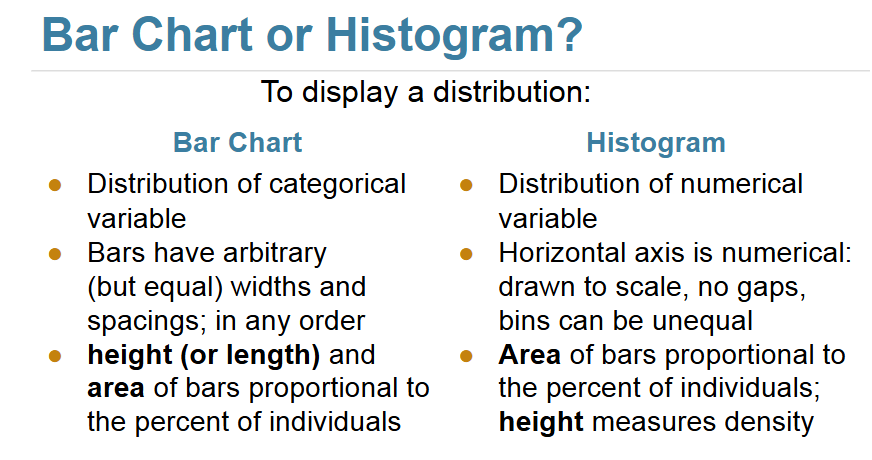

<br><br><br><br><br><br>

--- 

## Categorical Distribution 

How often does each possible value occur? There are a finite set of values and so we can visualize those counts as a bar chart.

Using the top movies data from the previous lecture.

In [3]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


**Exercise:** Compute how many times does each studio appears in the list.  (Here we use the `group` function which we cover in more detail next week. [Data8 Reference Page](https://www.data8.org/sp23/reference/))

In [4]:
toy = Table().with_columns("Pets", make_array("Cat", "Dog", "Dog", "Bird", "Cat"))
toy

Pets
Cat
Dog
Dog
Bird
Cat


In [5]:
toy.group("Pets")

Pets,count
Bird,1
Cat,2
Dog,2


In [6]:
studio_counts = top_movies.select('Studio').group("Studio")
studio_counts

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


<br><br><br><br><br><br>

**Exercise:** Construct a bar chart depicting the number of movies from each studio (the `"count"`).

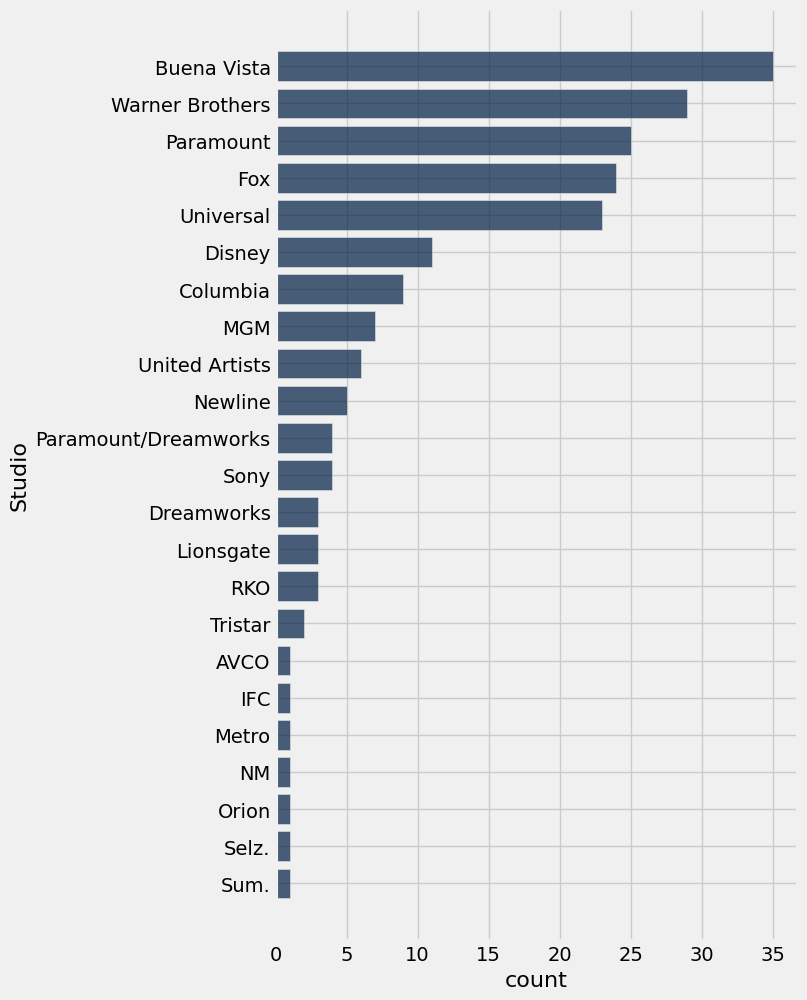

In [7]:
(
    studio_counts
        .sort("count", descending=True)
        .barh("Studio", "count")
)

<br><br><br><br><br><br>

**Exercise:** Construct a bar chart containing the percentage of the movies from each studio.

In [8]:
count_col = studio_counts.column('count')
studio_counts = studio_counts.with_column("percent", count_col / count_col.sum() * 100 )
studio_counts

Studio,count,percent
AVCO,1,0.5
Buena Vista,35,17.5
Columbia,9,4.5
Disney,11,5.5
Dreamworks,3,1.5
Fox,24,12
IFC,1,0.5
Lionsgate,3,1.5
MGM,7,3.5
Metro,1,0.5


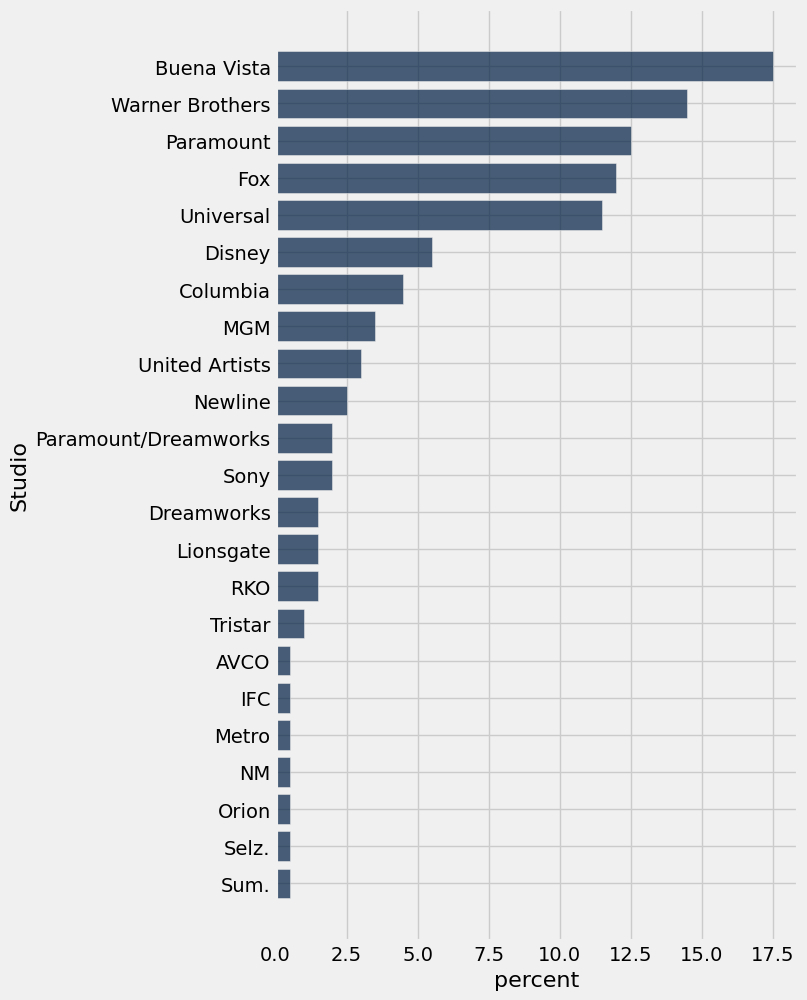

In [9]:
(
    studio_counts
    .sort("percent", descending=True)
    .barh("Studio", "percent")
)

<br><br><br><br><br><br>

---

<center> Return to Slides </center>

---

<br><br><br><br><br><br>

## Distributions of Numerical Data

The most basic tool for visualizing the distribution of numerical data is the histogram. 


</br></br></br>
In this part of the demo, we are going to examine the age of the top 200 films. 

In [10]:
top_movies.take(np.arange(5)) # just a preview

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997


**Exercise:** Add a column containing the age of each movie to the `top_movies` table.

In [11]:
this_year = 2023
ages = this_year - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


**Exercise:** Split the `"Age"` column into the following bins

In [12]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 102)

In [13]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,21
10,17
15,41
25,43
40,57
65,21
102,0


You can also use `np.arange` to create regular bins of a fixed size or even just specify a number.

In [14]:
top_movies.bin('Age', bins = np.arange(0, 126, 25))

bin,Age count
0,79
25,69
50,42
75,9
100,1
125,0


In [15]:
# 设置等宽的bin
top_movies.bin('Age', bins = 10)

bin,Age count
6,41
15.6,40
25.2,28
34.8,24
44.4,25
54,19
63.6,13
73.2,6
82.8,3
92.4,1


<br><br><br><br><br><br>

---

<center> Return to Slides </center>

---

<br><br><br><br><br><br>

## Histograms 

We can construct histograms of numerical variables by calling `tbl.hist(...)` function using our `bins`.

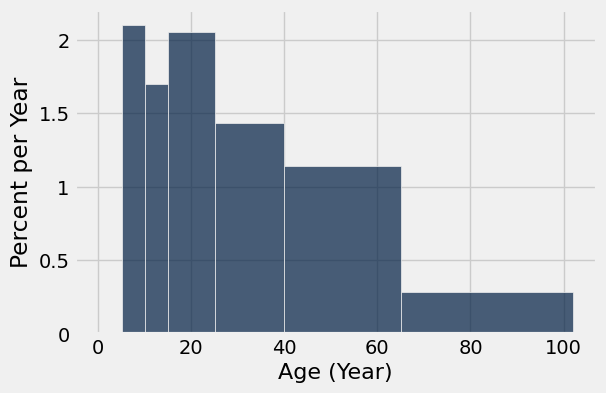

In [16]:
# Let's make our first histogram!
top_movies.hist('Age', unit = 'Year', bins = my_bins)

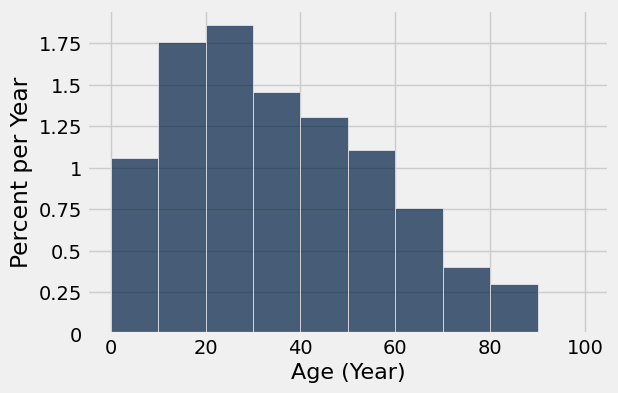

In [17]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

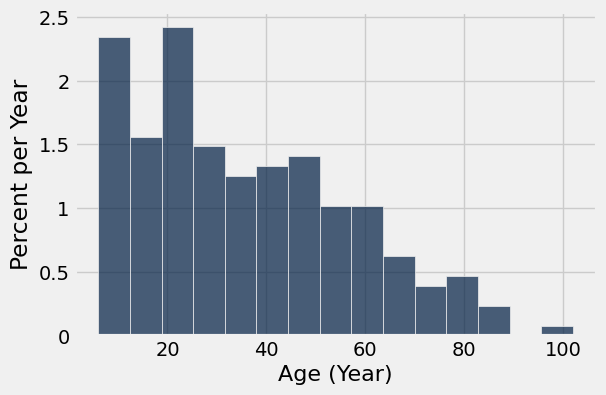

In [18]:

top_movies.hist('Age', bins = 15, unit='Year')

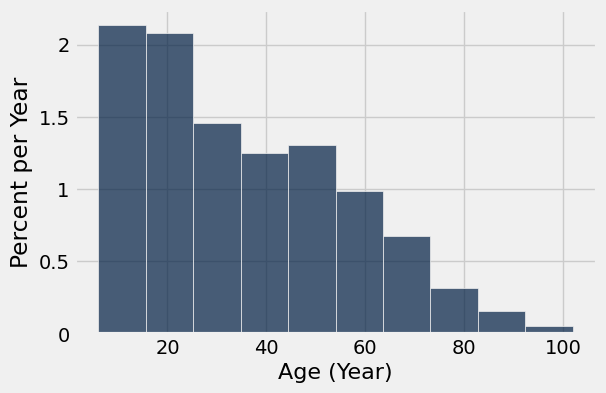

In [19]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

Using the interactive plotting tools:

In [20]:
top_movies.ihist('Age', unit='Year')

## Exploring Data Distributions

In [21]:
top_movies.ihist("Gross (Adjusted)", bins=20)

Examining relationships with studios to compare distributions

In [22]:
(
    top_movies
    .where("Studio", are.contained_in(make_array("Disney", "Buena Vista")))
    .ihist("Year", group="Studio", bins=20)
)


In [23]:
(
    top_movies
    .where("Studio", are.contained_in(make_array("Disney", "Buena Vista")))
    .ihist("Gross (Adjusted)", group="Studio", bins=20)
)


<br><br><br><br><br><br>

---

<center> Return to Slides </center>

---

<br><br><br><br><br><br>

## Height 
Lets compute the heights for the bars using our bins from before:

bin,Age count
0,0
5,21
10,17
15,41
25,43
40,57
65,21
102,0


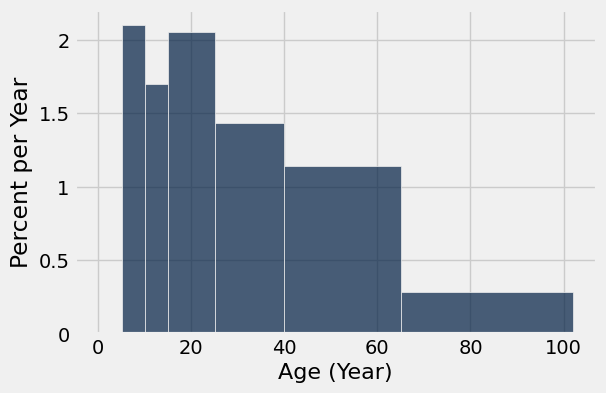

In [24]:
top_movies.hist('Age', bins=my_bins, unit='Year')
binned_data

**Exercise:** Add a column containing the percentage of data in each bin.

In [25]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100 * binned_data.column('Age count') / binned_data.column('Age count').sum())
binned_data

bin,Age count,Percent
0,0,0
5,21,10.5
10,17,8.5
15,41,20.5
25,43,21.5
40,57,28.5
65,21,10.5
102,0,0


**Question:** What is the height of the [40, 65] bin?  Remember:

\begin{align}
\text{Area} =  \text{Width}\,\, \times  \,\, \text{Height} \quad \rightarrow \quad
\text{Height} =  \frac{\text{Area}}{ \text{Width}}
\end{align}

In [26]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

28.5

In [27]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [28]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.14

**Exercise:** Compute the height of all the bins in binned data.

In [29]:
binned_data

bin,Age count,Percent
0,0,0
5,21,10.5
10,17,8.5
15,41,20.5
25,43,21.5
40,57,28.5
65,21,10.5
102,0,0


Restrict the table to just the left side bins by dropping the last row.  I will call this `bi` (for bin intervals) since we are going to be typing it a lot.

In [30]:
bi = (
    binned_data
    .take(np.arange(binned_data.num_rows - 1))
    .relabeled("bin", "Left")
)
bi

Left,Age count,Percent
0,0,0
5,21,10.5
10,17,8.5
15,41,20.5
25,43,21.5
40,57,28.5
65,21,10.5


Create an array of the right side of the bins by dropping the first row.

In [31]:
right_bins = (
    binned_data
    .take(np.arange(1, binned_data.num_rows))
    .column("bin")
)
right_bins

array([  5,  10,  15,  25,  40,  65, 102], dtype=int64)

In [32]:
bi = bi.with_column("Right", right_bins)
bi

Left,Age count,Percent,Right
0,0,0,5
5,21,10.5,10
10,17,8.5,15
15,41,20.5,25
25,43,21.5,40
40,57,28.5,65
65,21,10.5,102


Assemble the bi (Bin Interval) table by computing the width and the height of each column.

In [33]:
bi = bi.with_column("Width", bi.column("Right") - bi.column("Left"))
bi = bi.with_column("Height", bi.column("Percent") / bi.column("Width"))
bi

Left,Age count,Percent,Right,Width,Height
0,0,0,5,5,0
5,21,10.5,10,5,2.1
10,17,8.5,15,5,1.7
15,41,20.5,25,10,2.05
25,43,21.5,40,15,1.43333
40,57,28.5,65,25,1.14
65,21,10.5,102,37,0.283784


In [34]:
# Read the full Census table
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = Table.read_table(data)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


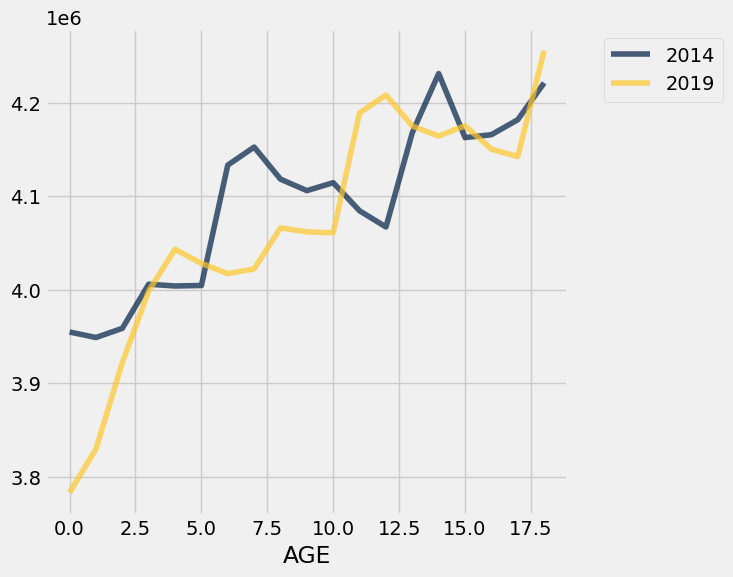

In [35]:
children.plot('AGE')

In [36]:
usa_ca = Table.read_table('usa_ca_2019.csv')
usa_ca

FileNotFoundError: [Errno 2] No such file or directory: 'usa_ca_2019.csv'